<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

15. <b> Modeling of a multiperiod production and storage problem </b>
    - 15.1 Taïwan university instance ( Coursera chpt 2.8 )
    - 15.2 Mathematical modeling
    - 15.3 Python Pulp solution ( hard coded )
    - 15.4 Python Pulp solution ( compact model )
    - 15.5 Winston book / Indiana university instance : National steel corporation
    - 15.6 Mathematical modeling
    - 15.7 Python Pulp solution and book solution comparison
16. <b> Modeling of a multiperiod cash flow matching </b>
    - 16.1 Columbia university instance : Project funding 
    - 16.2 Mathematical modeling ( hard coded )
    - 16.3 Python Pulp solution and course solution comparison
    - 16.4 Mathematical modeling ( compact model  )
    - 16.5 Washington university instance : Finco Investment Corporation
    - 16.6 Mathematical modeling (Hard coded)
    - 16.7 Python Pulp solution and book solution comparison 
    - 16.8 Mathematical modeling ( compact model  )
    - 16.9 Lingo instance : Multi-period Financial Model
    - 16.10 Mathematical modeling (hard coded )
    - 16.11 Python Pulp Solution
    - 16.12 Mathematical modeling (compact model )
    - 16.13 Python Pulp Solution
17. <b>Modeling of a multiperiod work scheduling</b>
    - 17.1 Instance - Washington University - Wagner(1975) type of problem
    - 17.2 Mathematical modeling
    - 17.3 Python Pulp solution
18. <b>Modeling of an optimal employees time shift scheduling problem</b>
    - 18.1 Instance - Microsoft problem : "Using Solver to schedule your workforce".
    - 18.2 Mathematical modeling (Hard coded model)
    - 18.3 Python Pulp solution
    - 18.4 Mathematical modeling and solution (Compact model)
    - 18.5 Instance - BIM problem : Reducing employees cost
    - 18.6 Mathematical modeling (Hard coded and compact model)
    - 18.7 Python Pulp solution
    - 18.8 Instance - Nurses time shift problem
    - 18.9 Mathematical modeling (Hard coded and compact model)
    - 18.10 Python Pulp solution
19. <b>Modeling of a linear portfolio optimization problem</b>
    - 19.1 Instance by Excel easy
    - 19.2 Mathematical modeling
    - 19.3 Python Pulp solution
    - 19.4 Instance by Mastering python for finance p.96
    - 19.5 Mathematical modeling
    - 19.6 Python Pulp solution
    - 19.7 Instance by Kenneth A Barker
    - 19.8 Mathematical modeling
    - 19.9 Python Pulp solution
    - 19.10 Instance by Andrew Hershy
    - 19.11 Mathematical modeling
    - 19.12 Python Pulp solution
20. <b>Modeling of a facility location problem</b>
    - 20.1 Instance - Taïwan university problem
    - 20.2 Mathematical modeling
    - 20.3 Python Pulp solution and Chang Yaochen code analysis
21. <b> Modeling of a single machine scheduling problem</b>
    - 21.1 Instance
    - 21.2 Mathematical modeling
    - 21.3 Python Pulp solution
    - 21.4 Single machine, parallels ,flow shop and job shop differences.
22. <b> Modeling an uncapacited transport problem </b>
    - Presentation 
    - Mathematical modeling
    - Python Pulp or Cplex solution
23. <b> Modeling a capacited transport problem  </b>
    - Presentation of the Daskin problem (2013)
    - Mathematical modeling
    - Python Pulp or Cplex solution
        - Using hard values
        - Using iterations
24. <b> Modeling a bin packing problem  </b>
    - Presentation and differences between 2d and 3d
    - Mathematical modeling
    - Python Pulp or Cplex solution
25. <b> Modeling a traveling salesman problem  </b>
    - Presentation 
    - Mathematical modeling
    - Python Pulp or Cplex solution
26. <b> Modeling a shortest path problem  </b>
    - Presentation of https://blog.sommer-forst.de/2013/04/06/solving-the-minimum-cost-flow-problem-4-pulp/
    - https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html
    - Mathematical modeling
    - Python Pulp or Cplex solution
27. <b> Modeling a chemistry combinatorial optimization  </b>
    - Presentation of the Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
28. <b> Modeling a petroleum combinatorial optimization </b>
    - Presentation and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
29. <b> Modeling of a multiple objectives problem</b>
    - Presentation of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
30. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
31. <b> Getting familiar with variables relaxations</b>

32. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


33. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>15. Modeling of a multiperiod production and storage problem </b>

<div style="text-align:center">
<img src="img/TopCable.jpg" width="500"/>
</div>

<b>15.1 Taïwan university Instance</b>

The manager predicts that we'll sell 100, 150, 200, and 170 on days 1, 2, 3, and 4 of the next week.

Production costs vary depending on the day of the week:
9th, 12th, 10th, and 12th on days 1, 2, 3, and 4 of the next week.

The storage cost is €1 per item stored, so if we keep it for 4 days, that's a cost of €4.

What is the best production plan to minimize costs and not have too much inventory?*

Link : https://www.coursera.org/learn/operations-research-modeling/lecture/vW447/2-8-simple-lp-formulation-production-and-inventory

<b>15.2 Math model</b><br>
Hard coded model :<br>
<img src="img/01. Formulation du L.P.png"></img>




<b>15.3 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Hard coded version :

In [18]:
# -----------------------------------
# Import Pulp
# -----------------------------------
import pulp

# -----------------------------------
# Type of problem
# -----------------------------------
problem = pulp.LpProblem("multiperiod_lp",pulp.LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
# Items production per day 1,2,3,4
P1 = pulp.LpVariable('Prodution1', lowBound=0, cat='Integer')
P2 = pulp.LpVariable('Prodution2', lowBound=0, cat='Integer')
P3 = pulp.LpVariable('Prodution3', lowBound=0, cat='Integer')
P4 = pulp.LpVariable('Prodution4', lowBound=0, cat='Integer')


# Inventory per day 1,2,3,4
I1 = pulp.LpVariable('Inventory1', lowBound=0, cat='Integer')
I2 = pulp.LpVariable('Inventory2', lowBound=0, cat='Integer')
I3 = pulp.LpVariable('Inventory3', lowBound=0, cat='Integer')
I4 = pulp.LpVariable('Inventory4', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective function : minimizing production costs + inventory costs (1$ per item in inventory)
problem += (9*P1 + 12*P2 + 10*P3 + 12*P4) + (1*I1 + 1*I2 + 1*I3 + 1*I4) 

# Inventory balancing constraints
problem += P1 - 100 == I1
problem += I1 + P2 - 150 == I2
problem += I2 + P3 - 200 == I3
problem += I3 + P4 - 170 == I4

problem += P1 >= 0
problem += P2 >= 0 
problem += P3 >= 0 
problem += P4 >= 0 

# -----------------------------------
# Solution
# -----------------------------------
result = problem.solve()

# Printing solution
print("---First day---")
print("Production:" ,pulp.value(P1))
print("Inventory:" ,pulp.value(I1))


print("---2nd day---")
print("Production:" ,pulp.value(P2))
print("Inventory:" ,pulp.value(I2))

print("---3rd day---")
print("Production:" ,pulp.value(P3))
print("Inventory:" ,pulp.value(I3))

print("---4th day---")
print("Production:" ,pulp.value(P4))
print("Inventory:" ,pulp.value(I4))

print("Minimized production and storage cost = :" ,pulp.value(problem.objective))



---First day---
Production: 250.0
Inventory: 150.0
---2nd day---
Production: 0.0
Inventory: 0.0
---3rd day---
Production: 370.0
Inventory: 170.0
---4th day---
Production: 0.0
Inventory: 0.0
Minimized production and storage cost = : 6270.0


<b>Solution Explanation</b>

Our multi-period interval here is 4 days.

The solver calculates what needs to be produced and put into inventory in order to end up with no inventory on hand at the end of these 4 days, while still meeting demand.

On the first day, we produce 250 units, which meets the manager's forecast of selling 100 units on the first day, and we keep 150 units in inventory for the second day.

On the third day, we produce 370 units, still with the aim of meeting the manager's forecast for the following 2 days, and we keep 170 units in inventory.

On the fourth day, we have minimized our inventory and our carrying costs, and we have nothing left.



<b>15.4 Compact model </b>

$$
Min (C) = \sum_{t=1}^{4} (c_{t}.x_{t} + sc_{t}.y_{t})
$$
$$
subject \thinspace to
$$
$$
  y_{t-1} + x_{t} - d_{t} = y_{t} \thinspace ∀ \thinspace t \in (1,...,4)
$$
$$
y_{0} = 0
$$

$$
where
$$

$$
 c_{t} = production \thinspace cost
$$
$$
 sc_{t} = storage \thinspace cost
$$
$$
 d_{t} = demand
$$

<b>15.4 Python Pulp solution </b>


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [ ]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("multiperiod_lp",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
# Define the production and storage costs for days 1, 2, 3, and 4; in quarters, it's the number of days, i.e., 4.
# Define production cost, inventory cost, and demand.
# Define the production costs per period, the inventory cost, and the demand reported by the sales department.
quaters = list(range(4))
c       =[9,12,10,12] # production cost
sc      =[1,1,1,1]
d       =[100,150,200,170]

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('quater_prod_', quaters,lowBound=0, cat='Continuous')
y = LpVariable.dicts('quater_inventory_', quaters,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model += lpSum([c[t]*x[t] for t in quaters]) + lpSum([sc[t]*y[t] for t in quaters])

# Constraints

# Inventory-balance constraints
model.addConstraint(x[0] - y[0] == d[0]) # (day 1)

for t in quaters[1:]: # For all day from 2 to 4
    model.addConstraint(x[t] - y[t] + y[t-1] == d[t]) # (days 2, 3, 4) # Not written the same as math model but it's still the same

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)
    
print("Minimized production and storage cost =  ", value(model.objective))

quater_inventory__0 = 150.0
quater_inventory__1 = 0.0
quater_inventory__2 = 170.0
quater_inventory__3 = 0.0
quater_prod__0 = 250.0
quater_prod__1 = 0.0
quater_prod__2 = 370.0
quater_prod__3 = 0.0
Minimized production and storage cost =   6270.0


<b>15.5 Winston book / Indiana university instance  : National steel corporation</b>


<div style="text-align:center">
<img src="img/iStock-1151115902_scrap-metal.jpg" width="500"/>
</div>

National Steel Corporation (NSC) produces a special-purpose steel
used in the aircraft and aerospace industries. The sales department
has received orders for the next four months...

Read : http://www.columbia.edu/itc/sipa/U6033/client_edit/lectures/lec4.pdf

Please notice: I am not responsible to leave this book part on the internet.




NSC can meet demand by producing steel, drawing on its
inventory, or a combination of these.Inventory at the start of
January is zero.Production costs are expected to increase in February and March.
Production and stock costs are:

<table>
  <tr>
    <th></th>
    <th>January</th>
     <th>February</th>
      <th>March</th>
       <th>April</th>
  </tr>
  <tr>
  <td>Production cost</td>
    <td>3000</td>
    <td>3300</td>
    <td>3600</td>
    <td>3600</td>
  </tr>
    <tr>
  <td>Inventory cost</td>
    <td>250</td>
    <td>250</td>
    <td>250</td>
    <td>250</td>
  </tr>
</table>

Production costs are dollars per tonne. 
Inventory costs are in dollars per tonne and per month. 

For example, 1 ton in stock for 1 month costs 250 dollars;for 2
months it costs $ 500.

NSC can produce a maximum of 3,000 tonnes of steel per month. 
What production plan does it respond to demand at the minimum cost?

<b>15.6 Maths model</b><br>
Compact model :
$$
Min (C) = \sum_{t=1}^{4} (c_{t}.x_{t} + sc_{t}.y_{t})
$$
$$
subject \thinspace to
$$
$$
  y_{t-1} + x_{t} - d_{t} = y_{t} \thinspace ∀ \thinspace t \in (1,...,4)
$$
$$
y_{0} = 0
$$

$$
where
$$

$$
 c_{t} = production \thinspace cost
$$
$$
 sc_{t} = storage \thinspace cost
$$
$$
 d_{t} = demand
$$


<b>15.7 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [20]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("multiperiod_production_minimize_cost",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
quaters =   list(range(4))
c       =   [3000, 3300, 3600, 3600]
sc      =   [250, 250, 250, 250]
d       =   [2300, 2000, 3100, 3000]

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('quater_prod_', quaters,lowBound=0, cat='Continuous')
y = LpVariable.dicts('quater_inventory_', quaters,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model += lpSum([c[t]*x[t] for t in quaters]) + lpSum([sc[t]*y[t] for t in quaters])

# Constraints

# Inventory-balance constraints
model.addConstraint(x[0] - y[0] == d[0]) # (day 1)

for t in quaters[1:]:
    model.addConstraint(x[t] - y[t] + y[t-1] == d[t]) # (days 2, 3, 4) 

# Production-capacity constraints 
for i in quaters:
    model.addConstraint(x[i]<=3000)

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)
    
print("Minimized production and storage cost =  ", value(model.objective))

quater_inventory__0 = 700.0
quater_inventory__1 = 1700.0
quater_inventory__2 = 0.0
quater_inventory__3 = 0.0
quater_prod__0 = 3000.0
quater_prod__1 = 3000.0
quater_prod__2 = 1400.0
quater_prod__3 = 3000.0
Minimized production and storage cost =   35340000.0


We see that the python pulp solution is the same than the Winston book / Indiana university Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
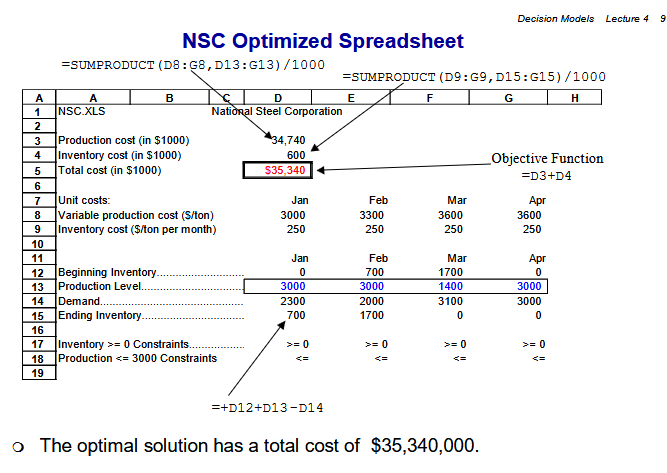

# <b> 16.  Modeling of a multiperiod cash flow matching </b>

<div style="text-align:center">
<img src="img/cfm.webp" width="500"/>
</div>

<b>16.1 Columbia university Instance : Project funding problem</b>
<div style="text-align:center">
<img src="img/project-funding.png" >
</div>

Read : http://www.columbia.edu/itc/sipa/U6033/client_edit/lectures/lec4.pdf



<b>16.2 Math model ( Hard coded )</b><br>
$$
Min (C) = 1.04x{1} + 1.00x{2} + 0.98x{3} + 0.92x{4}
$$
$$
subject \thinspace to
$$
$$
 0.05x{1} + 0.04x{2} + x{3} >= 20 \thinspace (year \thinspace 2002)
$$
$$
 0.05x{1} + 1.04x{2} + x{4} >= 30 \thinspace (year \thinspace 2003) 
$$
$$
  1.05x{1}  >= 40 \thinspace (year \thinspace 2004)
$$
$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (1,...,4)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace bonds \thinspace ( \thinspace In \thinspace millions \thinspace of \thinspace bonds)
$$



<b>16.3 Python Pulp solution ( Hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [21]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashFlow_matching",LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Xj = # of bond j to purchase today (in millions of bonds)
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Continuous')
X4 = pulp.LpVariable('X4', lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize the total cost of the bonds portfolio (in $ million):
problem += 1.04 * X1 + 1.00  * X2 + 0.98 * X3 + 0.92 * X4 # Strictly like math model , Buying bonds cost

# Constraints
# In each year, the cash flow from the bonds should equal or exceed 
# the project’s cash requirements: Cash flow from bonds >= Requirement
problem += 0.05  * X1 + 0.04 * X2 + X3 >= 20,( "year 2002") # Strictly like math model
problem +=  0.05 * X1 + 1.04 * X2 + X4 >= 30,( "year 2003") # Strictly like math model
problem += 1.05 * X1 >= 40,( "year 2004") # Strictly like math model

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Minimized total cost of the bond portfolio = ", value(problem.objective), " in $ millions")

X1 = 38.095238
X2 = 0.0
X3 = 18.095238
X4 = 28.095238
Minimized total cost of the bond portfolio =  83.19999972  in $ millions


We see that the python pulp solution is the same than the Columbia university Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>


Here is a screen cap :
<div style="text-align:center">
<img src="img/projectfund.png" >
</div>

Now, let's create the compact math model :

<b>16.4 Mathematical modeling ( compact model  )</b><br>
Warning : here is my first attempt...<br>
$$
Min (C) = \sum_{j=1}^{4} initialBuy_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
\sum_{j=1}^{4} cf_{ij}.x_{j} >= cr_{z} \thinspace ∀ \thinspace z \in (1,...,3)  
$$
$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (1,...,4)
$$
$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace bonds \thinspace ( \thinspace In \thinspace millions \thinspace of \thinspace bonds)
$$
$$
 cf_{j} = bonds \thinspace cash \thinspace flow 
$$
$$
 cr_{z} = project \thinspace cash \thinspace requirement 
$$
$$
 initialBuy_{j} = Bonds \thinspace buying \thinspace price 
$$

<b>16.5 Python Pulp solution ( Compact model )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [22]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashflow_matching",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
X = ["X1","X2","X3","X4"] # Xj = # of bond j to purchase today (in millions of bonds)
initialBuy = [1.04,1.00,0.98,0.92] # initial_buy = price payed per bond
cf = [
      [0.05,0.04,1,0],
      [0.05,1.04,0,1],
      [1.05,0,0,0]] # cf = bonds cash flow
cr = [20,30,40] # cr = cash requirement per year

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('number_of_bounds', X ,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize the total cost of the bonds portfolio (in $ million):
problem += lpSum([initialBuy[index]*x[j] for index,j in enumerate(x) ]) 

# --------- The precedent line recreates # problem += 1.04 * X1 + 1.00  * X2 + 0.98 * X3 + 0.92 * X4 # Strictly like math model , Buying bonds cost

# Constraints
# In each year, the cash flow from the bonds should equal or exceed 
# the project’s cash requirements: Cash flow from bonds >= Requirement

for z,v in enumerate(cf): # recreating cf[i] # each cf line represents a year
    problem += lpSum([v[r] * x[j] for r,j in enumerate(x)  ] )  >= cr[z] # cr[z] = number of cr columns, z = index, there is one per year

# -------- The precedent line recreates : -------------
# problem += 0.05  * X1 + 0.04 * X2 + X3 >= 20,( "year 2002") # Strictly like math model
# problem +=  0.05 * X1 + 1.04 * X2 + X4 >= 30,( "year 2003") # Strictly like math model
# problem += 1.05 * X1 >= 40,( "year 2004") # Strictly like math model

# Reminder : the function index,value in enumerate(array) gives the index and the value of an array. 

# -----------------------------------
# Solution
# -----------------------------------
# print(problem) # Debug !
problem.solve()

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Minimized total cost of the bond portfolio = ", value(problem.objective), " in $ millions")

number_of_bounds_X1 = 38.095238
number_of_bounds_X2 = 0.0
number_of_bounds_X3 = 18.095238
number_of_bounds_X4 = 28.095238
Minimized total cost of the bond portfolio =  83.19999972  in $ millions


<b>16.5 Washington university instance</b>

<div style="text-align:center">
<img src="img/diversify-your-bond-portfolio.jpg" width="500"/>
</div>


Finco Investment Corporation must determine investment strategy for the firm during the
next three years. 

Currently (time 0), 100,000 dollars is available for investment. Investments A,
B, C, D, and E are available. 

The cash flow associated with investing 1 dollar in each investment is given in Table 38.

For example, 1 dollar invested in investment B requires a $1 cash outflow at time 1 and re-
turns 50¢ at time 2 and 1 dollar at time 3. 

To ensure that the company’s portfolio is diversified,Finco requires that at most 75,000 dollars be placed in any single investment. 

In addition to investments A–E, Finco can earn interest at 8% per year by keeping uninvested cash in
money market funds. 

Returns from investments may be immediately reinvested. For example, the positive cash flow received from investment C at time 1 may immediately be reinvested in investment B. 

Finco cannot borrow funds, so the cash available for investment at any time is limited to cash on hand. 

Formulate an LP that will maximize cash on hand at time 3.

<div style="text-align:center">
<img src="img/finco.png" >
</div>



Link (Page 57 ): https://sites.math.washington.edu/~perkins/381AWin14/handouts/chapter3.pdf
and 
https://www.columbia.edu/~cs2035/courses/ieor3608.F02/finco.html

<b>16.6 Math model (Hard coded)</b><br>
Comin' soon

<b>16.7 Python Pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>



In [23]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashFlow_matching",LpMaximize)

# -----------------------------------
# Decision variables
# -----------------------------------

# Finco must decide how much money should be placed in each investment (including
# money market funds). Thus, we define the following decision variables:

# Dollars invested in investments 
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')
C = pulp.LpVariable('C', lowBound=0, cat='Integer')
D = pulp.LpVariable('D', lowBound=0, cat='Integer')
E = pulp.LpVariable('E', lowBound=0, cat='Integer')

# Dollars invested in in money market funds at time i
S0 = pulp.LpVariable('S0', lowBound=0, cat='Integer')
S1 = pulp.LpVariable('S1', lowBound=0, cat='Integer')
S2 = pulp.LpVariable('S2', lowBound=0, cat='Integer')


# -----------------------------------
# Math model
# -----------------------------------
# Finco wants to maximize cash on hand at time 3. At time 3, Finco’s cash on hand will be
# the sum of all cash inflows at time 3. From the description of investments A–E and the
# fact that from time 2 to time 3, S2 will increase to 1.08 * S2,

# Objective : maximize cash on hand at time 3
problem += B + 1.9 * D + 1.5 * E + 1.08 * S2

# Constraints
# investment starting point ( B and E are not available at time 0)
problem += A  + C + D + S0 == 100000

# Time 1
problem += 0.5 * A + 1.2 * C + 1.08 * S0 == B + S1

# Time 2
problem += A + 0.5 * B + 1.08 * S1 == E + S2

# Max invest
problem += A <= 75000
problem += B <= 75000
problem += C <= 75000
problem += D <= 75000
problem += E <= 75000

# Non negativity
problem +=  A >= 0
problem +=  B >= 0
problem +=  C >= 0
problem +=  D >= 0
problem +=  E >= 0
problem +=  S0 >= 0
problem +=  S1 >= 0
problem +=  S2 >= 0

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

# Print variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Maximized portfolio at time 3 = ", value(problem.objective), " in $ millions")

# We find the optimal solution to be z = 218,500, A  = 60,000, B = 30,000, D  = 40,000,
# E = 75,000, C = S0 = S1 = S2 = 0. Thus, Finco should not invest in money market
# funds. At time 0, Finco should invest $60,000 in A and $40,000 in D. Then, at time 1, the
# $30,000 cash inflow from A should be invested in B. Finally, at time 2, the $60,000 cash
# inflow from A and the $15,000 cash inflow from B should be invested in E. At time 3,
# Finco’s $100,000 will have grown to $218,500

A = 60000.0
B = 30000.0
C = 0.0
D = 40000.0
E = 75000.0
S0 = 0.0
S1 = 0.0
S2 = 0.0
Maximized portfolio at time 3 =  218500.0  in $ millions


<b> 16.9 Lingo instance : Multi-period Financial Model </b>

Comin' soon, link : https://www.lindo.com/downloads/LINGO_text/9-Multi-period_Planning_Problems.pdf

# <b>17.Modeling of a multiperiod work scheduling</b>

<div style="text-align:center">
<img src="img/people.jpg" width="500"/>
</div>

<b>17.1 Instance - Washington University - Wagner(1975) type of problem</b>

CSL is a chain of computer service stores. The number of hours of skilled repair time that
CSL requires during the next five months is as follows:
- Month 1 (January): 6,000 hours
- Month 2 (February): 7,000 hours
- Month 3 (March): 8,000 hours
- Month 4 (April): 9,500 hours
- Month 5 (May): 11,000 hours

At the beginning of January, 50 skilled technicians work for CSL. Each skilled technician
can work up to 160 hours per month. To meet future demands, new technicians must be
trained. It takes one month to train a new technician. During the month of training, a
trainee must be supervised for 50 hours by an experienced technician. Each experienced
technician is paid 2,000 dollars a month (even if he or she does not work the full 160 hours).
During the month of training, a trainee is paid 1,000 dollars a month. At the end of each month,
5% of CSL’s experienced technicians quit to join Plum Computers. Formulate an LP
whose solution will enable CSL to minimize the labor cost incurred in meeting the ser-
vice requirements for the next ﬁve months.

Read more : 
https://sites.math.washington.edu//~perkins/381AWin14/handouts/chapter3.pdf


<b>17.2 Math model (Hard coded )</b><br>
Comin' soon

<b>17.3 Python Pulp solution (Hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>



In [24]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("multiperiod_work_scheduling",LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------

# Xt = number of technicians trained during month t
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Continuous')
X4 = pulp.LpVariable('X4', lowBound=0, cat='Continuous')
X5 = pulp.LpVariable('X5', lowBound=0, cat='Continuous')

# Yt = number of experienced technicians at the beginning of month t 
Y1 = pulp.LpVariable('Y1', lowBound=0, cat='Continuous')
Y2 = pulp.LpVariable('Y2', lowBound=0, cat='Continuous')
Y3 = pulp.LpVariable('Y3', lowBound=0, cat='Continuous')
Y4 = pulp.LpVariable('Y4', lowBound=0, cat='Continuous')
Y5 = pulp.LpVariable('Y5', lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize Total labor = cost of paying trainees + cost of paying experienced technicians
problem += 1000 * X1 + 1000  * X2 + 1000 * X3 + 1000 * X4 +  1000 * X5 
+ 2000 * Y1 + 2000 * Y2 + 2000 * Y3  + 2000 * Y4 + 2000 * Y5

# Constraints

problem += 160 * Y1 - 50 * X1 >= 6000 
problem += 160 * Y2 - 50 * X2 >= 7000 
problem += 160 * Y3 - 50 * X3 >= 8000 
problem += 160 * Y4 - 50 * X4 >= 9500 
problem += 160 * Y5 - 50 * X5 >= 11000 

# What constraints does CSL face? Note that we are given Y1 > 50, and that for t { 1, 2,
# 3, 4, 5} CSL must ensure that
# Number of available technician hours during month t >= Number of technician hours required during month t 

# Because each trainee requires 50 hours of experienced technician time, and each skilled
# technician is available for 160 hours per month,
# Number of available technician hours during month t = 160yt - 50x

# As in the other multiperiod formulations, we need constraints that relate variables from
# different periods. In the CSL problem, it is important to realize that the number of skilled
# technicians available at the beginning of any month is determined by the number of skilled
# technicians available during the previous month and the number of technicians trained
# during the previous month:

# Experienced technicians available at beginning of month t =
# Experienced technicians available at beginning of month (t - 1)
# + technicians trained during month (t - 1)
# - experienced technicians who quit during month (t - 1) ( 5%)

# For example, for February, (73) yields
# Y2 = Y1 + X1 - 0.05Y1 or Y2 = 0.95Y1 + X1
problem +=  Y1 == 50
problem +=  0.95 * Y1 + X1 == Y2
problem +=  0.95 * Y2 + X2 == Y3
problem +=  0.95 * Y3 + X3 == Y4
problem +=  0.95 * Y4 + X4 == Y5

# Non negativity constraints
X1 >= 0
X2 >= 0
X3 >= 0
X4 >= 0
X5 >= 0
Y1 >= 0
Y2 >= 0
Y3 >= 0
Y4 >= 0
Y5 >= 0

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

print('Statut:', LpStatus[problem.status])

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print(" Minimized cost of paying employees = ", value(problem.objective), " dollars ")

# In reality, the yt’s must be integers, so our solution is difficult to interpret. The problem with our formulation is that assuming that exactly 5% of the employees quit each
# month can cause the number of employees to change from an integer during one month
# to a fraction during the next month. We might want to assume that the number of employees quitting each month is the integer closest to 5% of the total workforce, but then
# we do not have a linear programming problem!

Statut: Optimal
X1 = 0.0
X2 = 8.4531681
X3 = 11.450138
X4 = 9.5180723
X5 = 0.0
Y1 = 50.0
Y2 = 47.5
Y3 = 53.578168
Y4 = 62.349398
Y5 = 68.75
 Minimized cost of paying employees =  29421.3784  dollars 


<b> 17.4 Mathematical modeling (compact model )</b><br>
Comin' soon

#  <b> 18.Modeling of an optimal employees time shift scheduling problem</b>

<div style="text-align:center">
<img src="img/employeesex.jpg" width="500"/>
</div>

<b>18.1 Instance - Microsoft problem : "Using Solver to schedule your workforce".</b>

Link : https://support.microsoft.com/en-us/office/using-solver-to-schedule-your-workforce-7ae8dd69-7582-4f41-83f1-ea3543398b46

Contoso bank processes checks 7 days a week. The number of workers needed each day to process checks is shown in row 14 of the Excel worksheet shown below. For example, 13 workers are needed on Tuesday, 15 workers are needed on Wednesday, and so on. All bank employees work 5 consecutive days. What is the minimum number of employees the bank can have and still meet its labor requirements?

<div style="text-align:center">
<img src="https://support.microsoft.com/images/en-us/b63e1a7d-c4f0-4b54-9ace-63d9c40100ba" width="800">
</div>

Needed employees:
- Monday: 17
- Tuesday: 13
- Wednesday: 15
- Thursday: 17
- Friday: 9
- Saturday: 9
- Sunday: 12

Constraint: Each employee works 5 days straight followed by 2 days off.
How many employees should be hired?


<b>18.2 Math model (Hard coded)</b><br>

$$
Min (E) = x{0} + x{1} + x{2} + x{3} + x{4} + x{5} + x{6}
$$
$$
subject \thinspace to
$$
$$
 x{0} + x{3} + x{4} + x{5} + x{6} >= 17 
$$
$$
 x{0} + x{1} + x{4} + x{5} + x{6} >= 13 
$$

$$
 x{0} + x{1} + x{2} + x{5} + x{6} >= 15 
$$

$$
 x{0} + x{1} + x{2} + x{3} + x{4} >= 9 
$$
$$
 x{1} + x{2} + x{3} + x{4} + x{5} >= 9 
$$
$$
 x{2} + x{3} + x{4} + x{5} + x{6} >= 12 
$$

$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (0,...,6)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace employees \thinspace working \thinspace on \thinspace day \thinspace j
$$



<b>18.3 Python Pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [ ]:
# -----------------------------------
# Import Pulp
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("minimize_staffing",p.LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
days = list(range(7))
x = p.LpVariable.dicts('employee_starts_on_day', days,lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Define Objective
model += p.lpSum([x[i] for i in days])

# Define Constraints
model += x[0] + x[3] + x[4] + x[5] + x[6] >= 17     # Monday
model += x[0] + x[1] + x[4] + x[5] + x[6] >= 13     # Thuesday
model += x[0] + x[1] + x[2] + x[5] + x[6] >= 15     # Wesneday
model += x[0] + x[1] + x[2] + x[3] + x[6] >= 17     # Thuesday
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 9      # Friday
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 9      # Saturday
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 12     # Sunday

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

print("Minimized number of employees = ", p.value(model.objective))

[0, 1, 2, 3, 4, 5, 6]
employee_starts_on_day_0 = 3.0
employee_starts_on_day_1 = 3.0
employee_starts_on_day_2 = 0.0
employee_starts_on_day_3 = 4.0
employee_starts_on_day_4 = 0.0
employee_starts_on_day_5 = 2.0
employee_starts_on_day_6 = 8.0
Minimized number of employees =  20.0


Analysis of the previous result.

I would like to know if on Monday, I will have 17 people present.
So, I go back on the 5 highest days in the week and made the sum

Day 6 either Sunday: 8.0 employees start to work + day 5 or Saturday: 2 employees start + day 4 or Friday: 0 employees start to work + day 3 or Thursday: 4 employees start to work
Total: 14 employees + 3 on the day 0 on Monday, so it's a good 17 people who work on Monday!

We see that the minimized needed employees python pulp solution is the same than the Microsoft Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/microsoft.png" >
</div>

<b>18.4 Math model (Compact model)</b><br>
Comin'soon


<b>18.5 </b>